**Code for Exercise 3**

In [1]:
# Import all modules that are required
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML

requests.packages.urllib3.disable_warnings()

import warnings
warnings.filterwarnings("ignore")

In [4]:
def get_data(url,class1,class2,class3):
  snapshot_url = url
  snapshot = requests.get(snapshot_url)
  raw_html = snapshot.text
  soup = BeautifulSoup(raw_html, 'html.parser')
  card_titles = soup.select('.'+class1)#('.Card-title')
  card_times = soup.select('.'+class2)
  card_classes = soup.select('.'+class3)
  class_news = url.split('/')[-2]#'finance'
  titles = []
  times = []
  classes = []
  matrix = []
  for i in range(0, len(card_titles)):
    datestring = card_times[i].text#Fri, Oct 23th, 2020,
    d = datestring.split(" ")
    date_list = []
    if (d[1] == 'Ago' or d[1] == 'hours' or d[1] == 'hour' or d[1] == 'min'):
      today = date.today()
      date_list = [today.day,today.month]
    else:
      date_list = [datetime.strptime(d[1],  '%b').month, int(d[2][:-2])]
      pom = [card_titles[i].select_one('div').text,card_times[i].text,date_list[1],date_list[0]]
      if i < 5:
        pom.append('Top News '+class_news)
      else:
        pom.append(card_classes[i-5].select_one('div').text)
      matrix.append(pom)
  df = pd.DataFrame(np.array(matrix),columns=['Title','Date','Day','Month','Class'])
  return df

In [21]:
df_finance = get_data('https://www.cnbc.com/finance/','Card-title','Card-time','Card-eyebrow')

In [22]:
df_health = get_data('https://www.cnbc.com/health-and-science/','Card-title','Card-time','Card-eyebrow')

In [23]:
df_finance

,Title,Date,Day,Month,Class
0,Virus surge is leading to a double-dip recessi...,"Mon, Nov 30th 2020",30,11,Top News finance
1,Tesla's stock will be added to the S&P 500 in ...,"Mon, Nov 30th 2020",30,11,Top News finance
2,Stocks making the biggest moves after hours: Z...,"Mon, Nov 30th 2020",30,11,Top News finance
3,Stocks making the biggest moves midday: Modern...,"Mon, Nov 30th 2020",30,11,Top News finance
4,Winklevoss twins say bitcoin will be the decad...,"Mon, Nov 30th 2020",30,11,Markets
5,Stocks making the biggest moves premarket: Mod...,"Mon, Nov 30th 2020",30,11,Market Insider
6,Huge November gains may make the usual year-en...,"Mon, Nov 30th 2020",30,11,Trader Talk
7,"Dow falls more than 200 points, but still post...","Mon, Nov 30th 2020",30,11,Markets
8,Market bull predicts holiday season surge will...,"Sun, Nov 29th 2020",29,11,Trading Nation
9,Congress stalled on stimulus talks as millions...,"Sat, Nov 28th 2020",28,11,Personal Finance


In [24]:
df_health

,Title,Date,Day,Month,Class
0,Biden Covid advisor 'relieved' about Dr. Scott...,"Mon, Nov 30th 2020",30,11,Top News health-and-science
1,Controversial White House coronavirus advisor ...,"Mon, Nov 30th 2020",30,11,Top News health-and-science
2,"CEO of Montana hospital, which lost a doctor t...","Mon, Nov 30th 2020",30,11,Health and Science
3,NY implements emergency hospital measures as C...,"Mon, Nov 30th 2020",30,11,Health and Science
4,First 'mass air shipment' of Pfizer's Covid va...,"Mon, Nov 30th 2020",30,11,Airlines
5,Watch live: New York Gov. Andrew Cuomo holds a...,"Mon, Nov 30th 2020",30,11,Health and Science
6,Watch live: WHO holds a press briefing on coro...,"Mon, Nov 30th 2020",30,11,Health and Science
7,DeepMind solves 50-year-old ‘grand challenge’ ...,"Mon, Nov 30th 2020",30,11,Tech
8,Thanksgiving air travel rises to pandemic high...,"Mon, Nov 30th 2020",30,11,Airlines
9,Up to 30% of Americans may get Covid by year-e...,"Mon, Nov 30th 2020",30,11,Health and Science


**Save and Read .CSV**

In [25]:
df_finance.to_csv('/content/sample_data/dataset_finance.csv', index = False)

In [26]:
df_health.to_csv('/content/sample_data/dataset_health.csv', index = False)

In [27]:
df_finance = pd.read_csv('/content/sample_data/dataset_finance.csv')

In [28]:
df_health = pd.read_csv('/content/sample_data/dataset_health.csv')

In [29]:
df_finance

,Title,Date,Day,Month,Class
0,Virus surge is leading to a double-dip recessi...,"Mon, Nov 30th 2020",30,11,Top News finance
1,Tesla's stock will be added to the S&P 500 in ...,"Mon, Nov 30th 2020",30,11,Top News finance
2,Stocks making the biggest moves after hours: Z...,"Mon, Nov 30th 2020",30,11,Top News finance
3,Stocks making the biggest moves midday: Modern...,"Mon, Nov 30th 2020",30,11,Top News finance
4,Winklevoss twins say bitcoin will be the decad...,"Mon, Nov 30th 2020",30,11,Markets
5,Stocks making the biggest moves premarket: Mod...,"Mon, Nov 30th 2020",30,11,Market Insider
6,Huge November gains may make the usual year-en...,"Mon, Nov 30th 2020",30,11,Trader Talk
7,"Dow falls more than 200 points, but still post...","Mon, Nov 30th 2020",30,11,Markets
8,Market bull predicts holiday season surge will...,"Sun, Nov 29th 2020",29,11,Trading Nation
9,Congress stalled on stimulus talks as millions...,"Sat, Nov 28th 2020",28,11,Personal Finance


In [30]:
df_health

,Title,Date,Day,Month,Class
0,Biden Covid advisor 'relieved' about Dr. Scott...,"Mon, Nov 30th 2020",30,11,Top News health-and-science
1,Controversial White House coronavirus advisor ...,"Mon, Nov 30th 2020",30,11,Top News health-and-science
2,"CEO of Montana hospital, which lost a doctor t...","Mon, Nov 30th 2020",30,11,Health and Science
3,NY implements emergency hospital measures as C...,"Mon, Nov 30th 2020",30,11,Health and Science
4,First 'mass air shipment' of Pfizer's Covid va...,"Mon, Nov 30th 2020",30,11,Airlines
5,Watch live: New York Gov. Andrew Cuomo holds a...,"Mon, Nov 30th 2020",30,11,Health and Science
6,Watch live: WHO holds a press briefing on coro...,"Mon, Nov 30th 2020",30,11,Health and Science
7,DeepMind solves 50-year-old ‘grand challenge’ ...,"Mon, Nov 30th 2020",30,11,Tech
8,Thanksgiving air travel rises to pandemic high...,"Mon, Nov 30th 2020",30,11,Airlines
9,Up to 30% of Americans may get Covid by year-e...,"Mon, Nov 30th 2020",30,11,Health and Science


**Some quick EDA**

In [31]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   33 non-null     object
 1   Date    33 non-null     object
 2   Day     33 non-null     int64 
 3   Month   33 non-null     int64 
 4   Class   33 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.4+ KB


In [32]:
df_finance.head()

,Title,Date,Day,Month,Class
0,Virus surge is leading to a double-dip recessi...,"Mon, Nov 30th 2020",30,11,Top News finance
1,Tesla's stock will be added to the S&P 500 in ...,"Mon, Nov 30th 2020",30,11,Top News finance
2,Stocks making the biggest moves after hours: Z...,"Mon, Nov 30th 2020",30,11,Top News finance
3,Stocks making the biggest moves midday: Modern...,"Mon, Nov 30th 2020",30,11,Top News finance
4,Winklevoss twins say bitcoin will be the decad...,"Mon, Nov 30th 2020",30,11,Markets


In [34]:
df_top_news= df_finance[df_finance.Class == 'Top News finance']
df_top_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   4 non-null      object
 1   Date    4 non-null      object
 2   Day     4 non-null      int64 
 3   Month   4 non-null      int64 
 4   Class   4 non-null      object
dtypes: int64(2), object(3)
memory usage: 192.0+ bytes


In [35]:
df_top_news.sort_values('Day').head()

,Title,Date,Day,Month,Class
0,Virus surge is leading to a double-dip recessi...,"Mon, Nov 30th 2020",30,11,Top News finance
1,Tesla's stock will be added to the S&P 500 in ...,"Mon, Nov 30th 2020",30,11,Top News finance
2,Stocks making the biggest moves after hours: Z...,"Mon, Nov 30th 2020",30,11,Top News finance
3,Stocks making the biggest moves midday: Modern...,"Mon, Nov 30th 2020",30,11,Top News finance


In [36]:
df = pd.concat([df_finance, df_health], ignore_index = True)
df

,Title,Date,Day,Month,Class
0,Virus surge is leading to a double-dip recessi...,"Mon, Nov 30th 2020",30,11,Top News finance
1,Tesla's stock will be added to the S&P 500 in ...,"Mon, Nov 30th 2020",30,11,Top News finance
2,Stocks making the biggest moves after hours: Z...,"Mon, Nov 30th 2020",30,11,Top News finance
3,Stocks making the biggest moves midday: Modern...,"Mon, Nov 30th 2020",30,11,Top News finance
4,Winklevoss twins say bitcoin will be the decad...,"Mon, Nov 30th 2020",30,11,Markets
...,...,...,...,...,...
59,"AstraZeneca, Oxford defend Covid vaccine trial...","Thu, Nov 26th 2020",26,11,Health and Science
60,World’s largest medical glove maker becomes th...,"Thu, Nov 26th 2020",26,11,Health and Science
61,No ski resorts or fireworks but lots of bubble...,"Thu, Nov 26th 2020",26,11,Europe Politics
62,Supreme Court blocks New York from enforcing C...,"Thu, Nov 26th 2020",26,11,Politics


In [37]:
df.to_csv('/content/sample_data/dataset_exercise3.csv', index = False)

In [38]:
df = pd.read_csv('/content/sample_data/dataset_exercise3.csv')

In [39]:
df

,Title,Date,Day,Month,Class
0,Virus surge is leading to a double-dip recessi...,"Mon, Nov 30th 2020",30,11,Top News finance
1,Tesla's stock will be added to the S&P 500 in ...,"Mon, Nov 30th 2020",30,11,Top News finance
2,Stocks making the biggest moves after hours: Z...,"Mon, Nov 30th 2020",30,11,Top News finance
3,Stocks making the biggest moves midday: Modern...,"Mon, Nov 30th 2020",30,11,Top News finance
4,Winklevoss twins say bitcoin will be the decad...,"Mon, Nov 30th 2020",30,11,Markets
...,...,...,...,...,...
59,"AstraZeneca, Oxford defend Covid vaccine trial...","Thu, Nov 26th 2020",26,11,Health and Science
60,World’s largest medical glove maker becomes th...,"Thu, Nov 26th 2020",26,11,Health and Science
61,No ski resorts or fireworks but lots of bubble...,"Thu, Nov 26th 2020",26,11,Europe Politics
62,Supreme Court blocks New York from enforcing C...,"Thu, Nov 26th 2020",26,11,Politics


**Continuius variables**

In [40]:
df_health.median()

Day      30.0
Month    11.0
dtype: float64

In [41]:
df_health['Day'].median()

30.0

In [42]:
df_finance.median()

Day      25.0
Month    11.0
dtype: float64

In [44]:
df.median()

Day      27.0
Month    11.0
dtype: float64

In [45]:
df.std()

Day      2.619704
Month    0.000000
dtype: float64

In [46]:
df.min()

Title    14 million workers face losing unemployment be...
Date                                    Fri, Nov 27th 2020
Day                                                     23
Month                                                   11
Class                                     5 Things to Know
dtype: object

In [47]:
df.max()

Title    ‘We should be back to normal’ by summer 2021, ...
Date                                    Wed, Nov 25th 2020
Day                                                     30
Month                                                   11
Class                                        World Economy
dtype: object

In [50]:
df.quantile([.1, .25, .5, .75], axis = 0)

,Day,Month
0.10,24.0,11.0
0.25,25.0,11.0
0.50,27.0,11.0
0.75,30.0,11.0


*Geometric Mean of the column in dataframe*

In [52]:
from scipy import stats   # NumPy contains array data and basic operations such as sorting, indexing, etc whereas, SciPy consists of all the numerical code

stats.gmean(df.iloc[:,2:4], axis = 0)

array([27.07662248, 11.        ])

**Categorical variables**

In [53]:
df_finance.Class.value_counts()

Market Insider      10
Markets              5
Top News finance     4
Trading Nation       3
Personal Finance     3
Cryptocurrency       2
Finance              2
Bitcoin              1
Trader Talk          1
Tech                 1
Federal Reserve      1
Name: Class, dtype: int64

In [54]:
df_health.Class.value_counts()

Health and Science             20
Airlines                        2
Politics                        2
Top News health-and-science     2
5 Things to Know                1
Europe Politics                 1
Coronavirus                     1
World Economy                   1
Tech                            1
Name: Class, dtype: int64

In [55]:
df.Class.value_counts()

Health and Science             20
Market Insider                 10
Markets                         5
Top News finance                4
Personal Finance                3
Trading Nation                  3
Politics                        2
Tech                            2
Top News health-and-science     2
Airlines                        2
Cryptocurrency                  2
Finance                         2
Coronavirus                     1
5 Things to Know                1
Federal Reserve                 1
Bitcoin                         1
Trader Talk                     1
World Economy                   1
Europe Politics                 1
Name: Class, dtype: int64

**Data Visualization**

In [57]:
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt   # Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

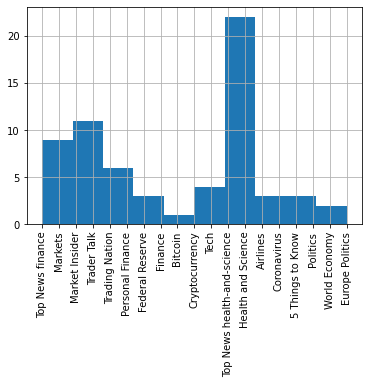

In [64]:
df['Class'].hist()
plt.xticks(rotation = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe59fa77d68>,
      dtype=object)

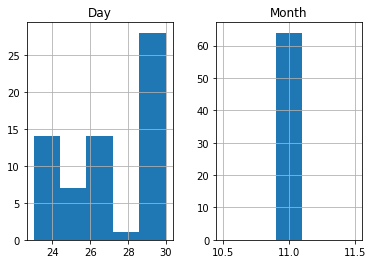

In [65]:
df.hist(bins = 5)

<Figure size 432x288 with 0 Axes>

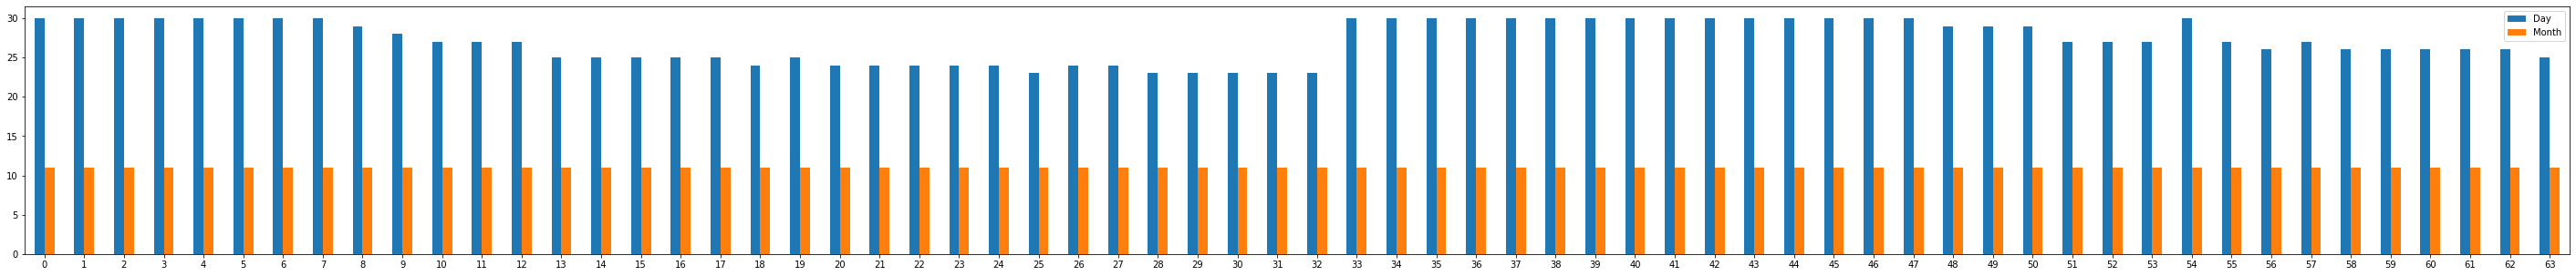

In [70]:
fig = plt.figure()
df.plot.bar(rot = 0, figsize = (50, 5))
fig.show()

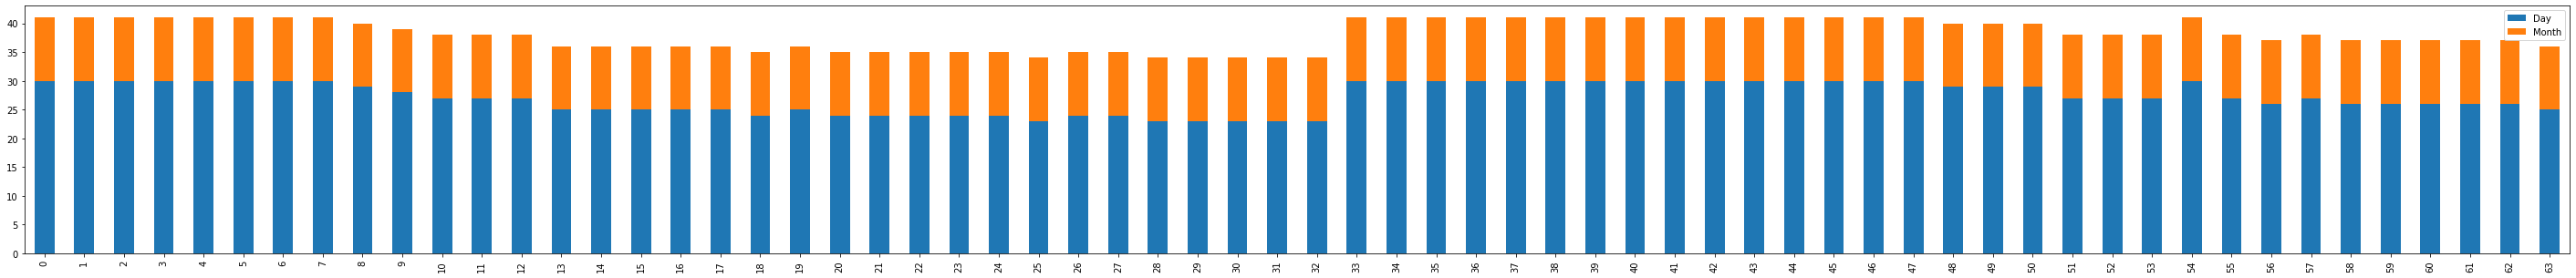

In [71]:
df.plot.bar(stacked = True, figsize = (50, 5))

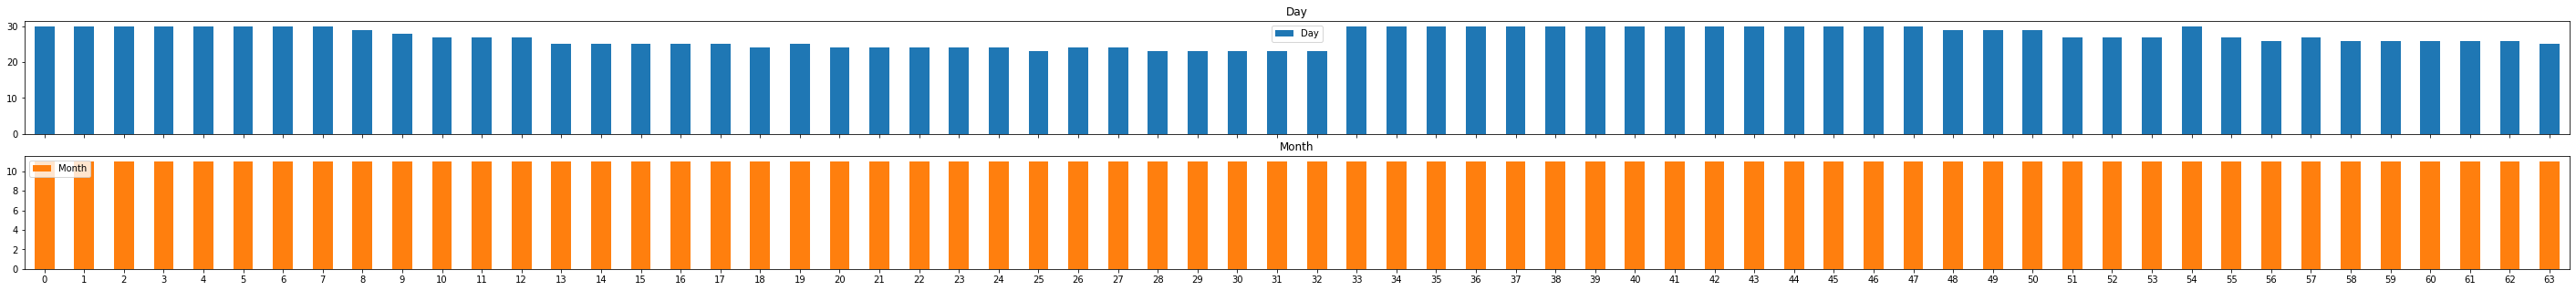

In [78]:
axes = df.plot.bar(rot = 0, subplots = True, figsize = (50, 5))   # subplots = True indicates that there will be two subplots
axes[1].legend(loc = 2)   # the legend is placed upper left

**Show Trend over Time**

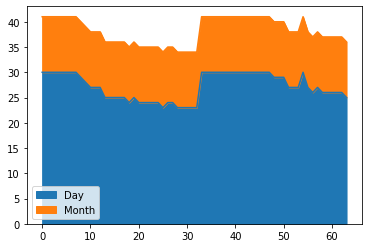

In [79]:
df.plot.area()

**Relationship**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

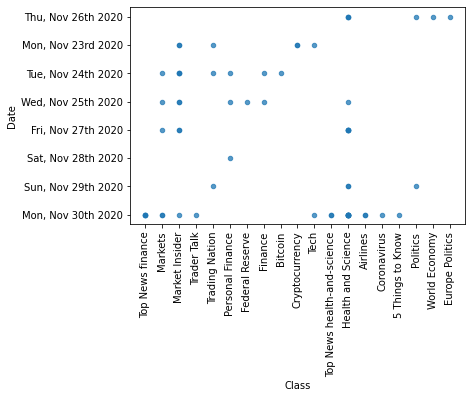

In [94]:
fig = plt.figure()
df.plot.scatter(x = 'Class', y = 'Date', alpha = 0.75, rot = 0)
plt.xticks(rotation = 90)

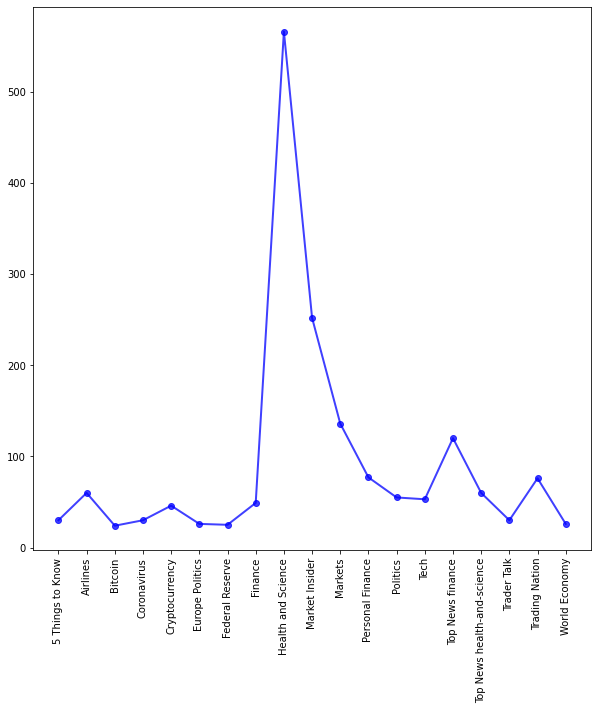

In [95]:
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=[10,10])
plt.plot(df.groupby('Class').Day.sum(),  '-ob', linewidth='2', alpha = 0.75)
plt.xticks(rotation=90)
plt.show()

**Comparison**

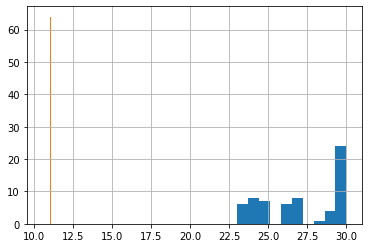

In [96]:
df['Day'].hist()
df['Month'].hist()

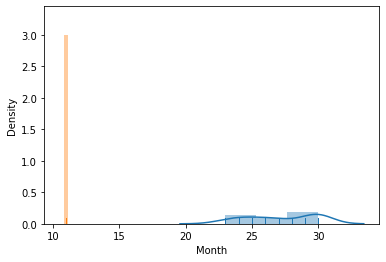

In [99]:
import seaborn as sns   # provides a high-level interface for drawing attractive and informative statistical graphics
line_up = sns.distplot(df['Day'], bins = 3, kde = True, rug = True, label = 'Day')
line_down=sns.distplot(df['Month'], bins=3, kde=True, rug=True,label = 'Month')

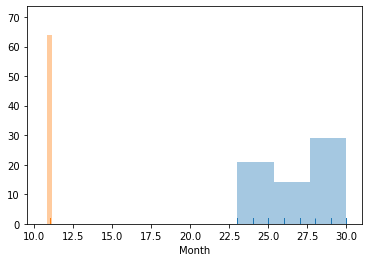

In [100]:
import seaborn as sns
line_up = sns.distplot(df['Day'], bins = 3, kde = False, rug = True, label = 'Day')
line_down = sns.distplot(df['Month'], bins = 3, kde = False, rug = True, label = 'Month')

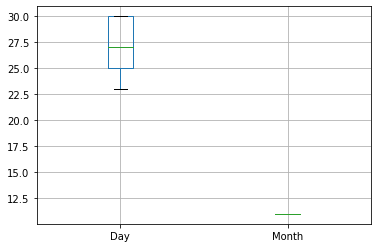

In [102]:
boxplot = df.boxplot(column=['Day', 'Month'])

**Kaggle dataset visualization**

*Add the files on your Google Drive or change the path for the training and testing dataset*

In [103]:
train = pd.read_csv('/content/drive/MyDrive/train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/test_data.csv')
train = train.drop(['case_id'], axis = 1)
test = test.drop(['case_id'], axis = 1)
train['dataset'] = 'train'
test['dataset'] = 'test'
df = pd.concat([train, test])

In [104]:
df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test
137054,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test
137055,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test


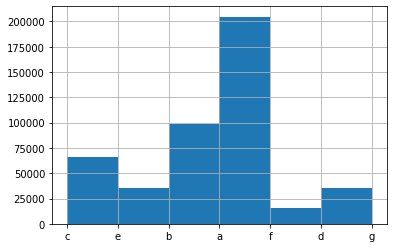

In [105]:
df['Hospital_type_code'].hist(bins = 6)

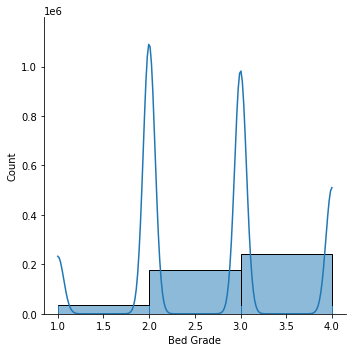

In [106]:
import seaborn as sns
line_up = sns.displot(df['Bed Grade'], bins = 3, kde = True, rug = True)

In [107]:
ds = df.groupby(['Department', 'Bed Grade'])['patientid'].count().reset_index()
ds.columns = ['Department', 'Bed Grade', 'count']

In [108]:
ds

,Department,Bed Grade,count
0,TB & Chest disease,1.0,773
1,TB & Chest disease,2.0,4880
2,TB & Chest disease,3.0,5151
3,TB & Chest disease,4.0,2944
4,anesthesia,1.0,452
5,anesthesia,2.0,10068
6,anesthesia,3.0,20163
7,anesthesia,4.0,11673
8,gynecology,1.0,32168
9,gynecology,2.0,144816


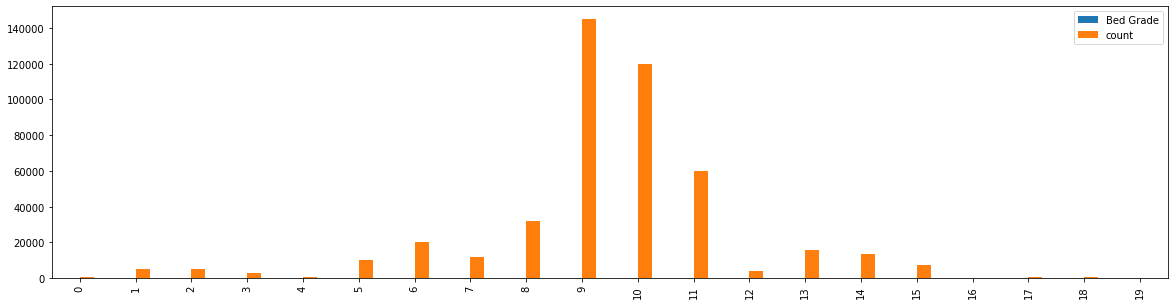

In [109]:
ds.plot.bar(figsize = (20, 5))

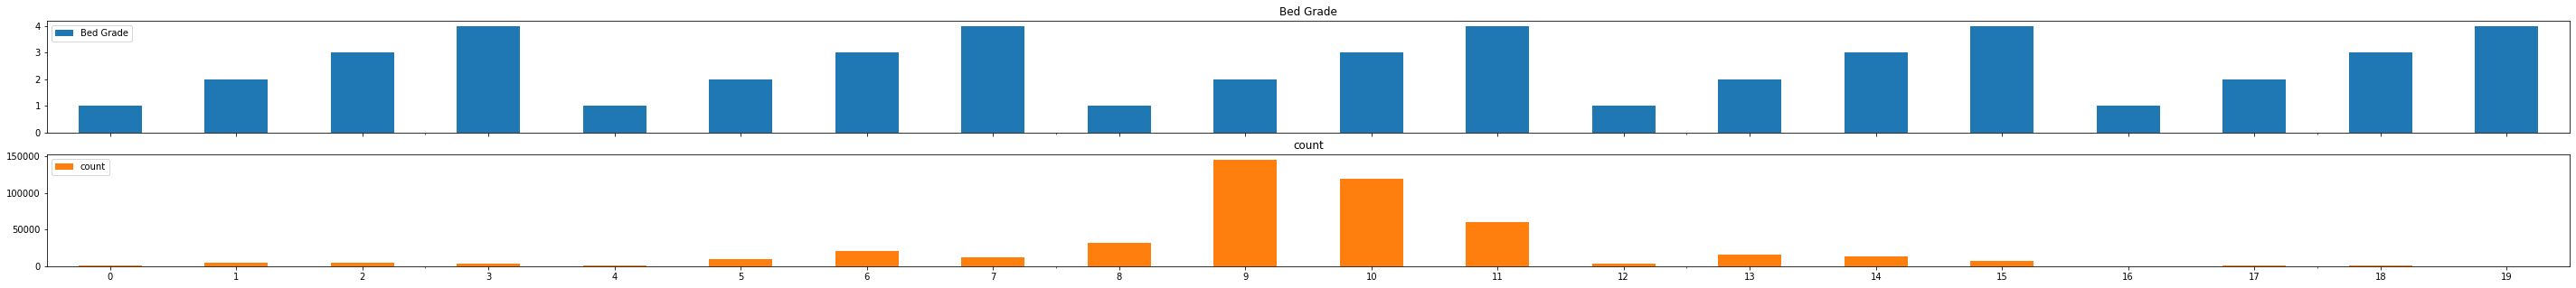

In [110]:
axes = ds.plot.bar(rot = 0, subplots = True, figsize = (50, 5))
axes[1].legend(loc = 2)

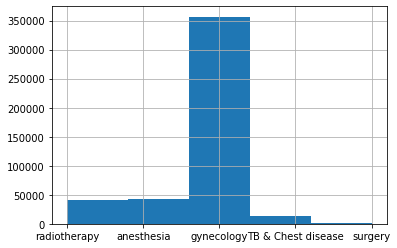

In [111]:
df['Department'].hist(bins = 5)

In [112]:
import plotly.express as px

fig = px.bar(
    ds,
    x = 'Department',
    y = 'count',
    color = 'Bed Grade',
    barmode = 'group',
    orientation = 'v',
    title = 'Cases per department distribution',
    width = 800,
    height = 700
)
fig.show()

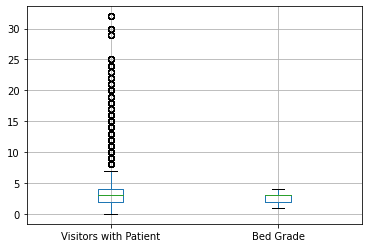

In [114]:
boxplot = df.boxplot(column = ['Visitors with Patient', 'Bed Grade'])

In [115]:
ds = df.groupby(['Department', 'Age'])['patientid'].count().reset_index()
ds.columns = ['Department', 'Age', 'Count']

In [116]:
ds

,Department,Age,Count
0,TB & Chest disease,0-10,602
1,TB & Chest disease,11-20,998
2,TB & Chest disease,21-30,1809
3,TB & Chest disease,31-40,2144
4,TB & Chest disease,41-50,2470
5,TB & Chest disease,51-60,2708
6,TB & Chest disease,61-70,1884
7,TB & Chest disease,71-80,964
8,TB & Chest disease,81-90,116
9,TB & Chest disease,91-100,56


In [118]:
import plotly.express as px

fig = px.bar(
    ds,
    x = 'Department',
    y = 'Count',
    color = 'Age',
    barmode = 'group',
    orientation = 'v',
    title = 'Cases per age distribution',
    width = 800,
    height = 700
)
fig.show()

In [123]:
ds = df.groupby(['Age', 'dataset'])['patientid'].count().reset_index()
ds.columns = ['Age', 'dataset', 'Count']

In [124]:
import plotly.express as px

fig = px.bar(
    ds,
    x = 'Age',
    y = 'Count',
    color = 'dataset',
    barmode = 'group',
    orientation = 'v',
    title = 'Cases per age distribution',
    width = 800,
    height = 700
)
fig.show()

In [125]:
ds = df.groupby(['Age', 'Severity of Illness'])['patientid'].count().reset_index()
ds.columns = ['Age', 'Severity of Illness', 'Count']

In [126]:
import plotly.express as px

fig = px.bar(
    ds,
    x = 'Age',
    y = 'Count',
    color = 'Severity of Illness',
    barmode = 'group',
    orientation = 'v',
    title = 'Cases per age distribution',
    width = 800,
    height = 700
)
fig.show()